# ISLR- Python: Chapter 3 -- Lab Linear Regression

- [Load Datasets](#Load-Datasets)
- [3.6.2 Simple Linear Regression](#3.6.2-Simple-Linear-Regression)
- [3.6.3 Multiple Linear Regression](#3.6.3-Multiple-Linear-Regression)
- [3.6.4 Interaction Terms](#3.6.4-Interaction-Terms)
- [3.6.5 Non-linear Transformations of the Predictors](#3.6.5-Non-linear-Transformations-of-the-Predictors)
- [3.6.6 Qualitative Predictors](#3.6.6-Qualitative-Predictors)

In [1]:
## perform imports and set-up
import numpy as np
import pandas as pd
import statsmodels.api as sm

from scipy import stats
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston # boston data set is part of sklearn
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

## Load Datasets

In [28]:
# Load Boston housing data set
boston = load_boston()

#Transform the data into a dataframe for analysis¶

# combine the predictors and responses for a dataframe
predictors = boston.data
response = boston.target
boston_data = np.column_stack([predictors,response])

# now get the column names of the data frame
col_names = np.append(boston.feature_names, 'MEDV')

# create the data frame
boston_df = pd.DataFrame(boston_data, columns = col_names)
boston_df.head()

# Load the carseats data set
carseats_df = pd.read_csv('../data/Carseats.csv',index_col = 0)

## 3.6.2 Simple Linear Regression

#### We will regress LSTAT (% of households with low economic status) onto the MEDV (median home values). We will do this using two methods -- scipy.linregress and statsmodels. We will look at several diagnostics that describe the quality of the fit.

#### Regress LSTAT onto MEDV (Scipy)

beta= [ 34.554 , -0.95 ]
R=-0.738, p_value=0.000, stderr=0.039


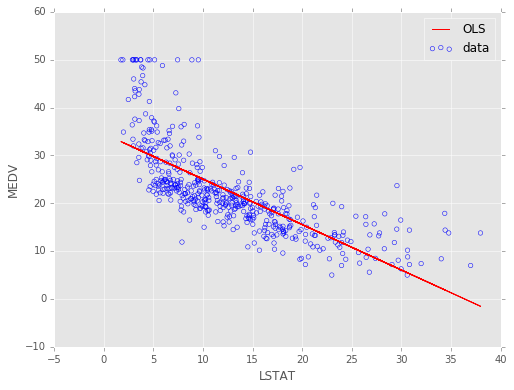

In [3]:
# Create a figure to plot our data and OLS estimate.
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(boston_df.LSTAT.values, boston_df.MEDV.values,facecolors='none', edgecolors='b',\
           label="data");
ax.set_ylabel('MEDV');
ax.set_xlabel('LSTAT');

# call scipy's linregress returning fit coefficients and simple statistics
beta1, beta0, r_value, p_value, stderr = stats.linregress(boston_df.LSTAT.values,\
                                                          boston_df.MEDV.values)

# add the estimation to the data plot
ax.plot(boston_df.LSTAT.values, beta0 + beta1*boston_df.LSTAT.values,color='r', label="OLS");
ax.legend(loc='best');

# print the regression estimates returned from scipy
print('beta= [',round(beta0,3),',', round(beta1,3),']')
print('R={0:.3f}, p_value={1:.3f}, stderr={2:.3f}'.format(r_value, p_value, stderr))

#### Regress LSTAT onto MEDV (Statsmodels)

In [4]:
# Another method is to use the package statsmodels.

# Create a design matrix
# set the independent variable as the LSTAT
X = boston_df.LSTAT
# We add a constant for the intercept term
X = sm.add_constant(X)

# set the dependent variable
Y = boston_df.MEDV

# create the model instance and fit
linear_model = sm.OLS(Y,X)
linear_results = linear_model.fit()
# data about the model is stored in summary
print(linear_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 24 Jun 2016   Prob (F-statistic):           5.08e-88
Time:                        10:05:12   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [5]:
# statsmodels includes functions for getting the prediction and confidence intervals.

# Get prediction interval for a given x
prstd, iv_l, iv_u = wls_prediction_std(linear_results)

# statsmodels also includes the confidence intervals for the fitted values (i.e. the mean fits)
# but they are buried in the results of summary table function.
from statsmodels.stats.outliers_influence import summary_table

# call the summary table at a (1-alpha)100% confidence interval level
simpleTable, data, column_names = summary_table(linear_results, alpha=0.05)

# Data contains the confidence intervals we want but we need to make sure we get the right
# columns so lets print off the names
print('column_names: ', column_names)

# Get confidence intervals for a given x
predicted_mean_ci_low, predicted_mean_ci_high = data[:,4:6].T

column_names:  ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


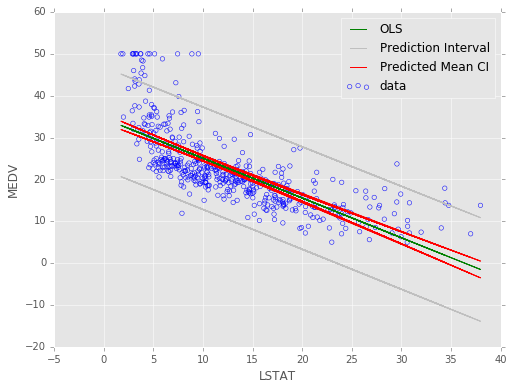

In [6]:
# Create a plot to plot the data, OLS estimate, prediction and confidence intervals
fig, ax = plt.subplots(figsize=(8,6))

# get numpy array values from dataframe
x = boston_df.LSTAT.values
y = boston_df.MEDV.values

# Plot the data
ax.scatter(x, y, facecolors='none', edgecolors='b', label="data")
# plot the models fitted values
ax.plot(x, linear_results.fittedvalues, 'g', label="OLS")

# plot the high and low prediction intervals
ax.plot(x, iv_u, color='0.75',label="Prediction Interval")
ax.plot(x, iv_l, color='0.75')

# plot the high and low mean confidence intervals
ax.plot(x,predicted_mean_ci_low, 'r', label="Predicted Mean CI")
ax.plot(x,predicted_mean_ci_high,'r')

ax.legend(loc='best');

plt.xlabel('LSTAT');
plt.ylabel('MEDV');

### Diagnostic Plots for Linear Model

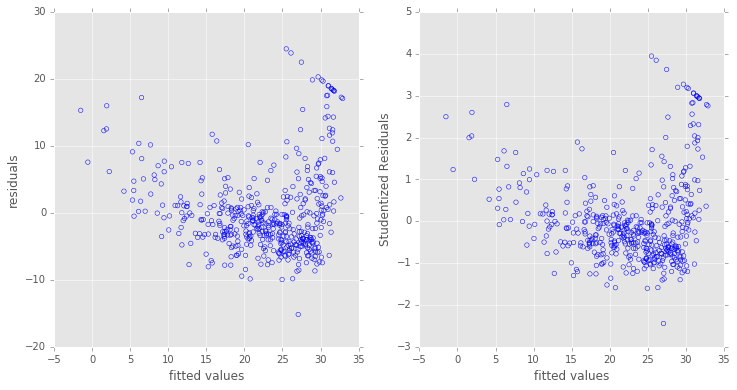

In [7]:
# Create plots of residuals
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# RESIDUALS
# The results contain the residuals
fitted_values = linear_results.fittedvalues.values
residuals = linear_results.resid.values

# Plot the residual for each fitted value
ax1.scatter(fitted_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
# The residual plot indicates significant nonlinearity (a u-shape pattern is clear)

# STUDENTIZED RESIDUALS
# To asses data outliers we will look at the studentized residuals. This is in the data array 
# returned from summary table (10th column)
studentized_residuals = data[:,10]

# Plot the studentized residuals
ax2.scatter(fitted_values,studentized_residuals, facecolors='none', edgecolors='b');
ax2.set_ylabel('Studentized Residuals');
ax2.set_xlabel('fitted values');

# |studentized residual| > 3 are generally considered outliers

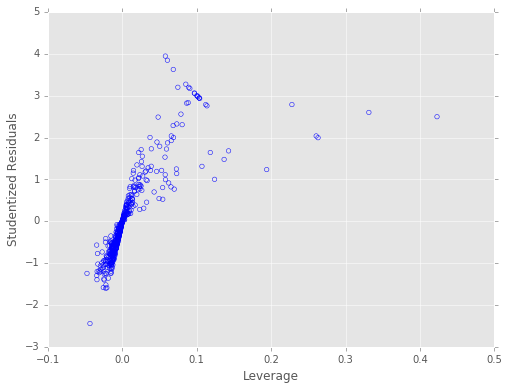

In [8]:
# We can also examine the leverages to identify points that may alter the regression line
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = OLSInfluence(linear_results).influence

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leverage, studentized_residuals,facecolors='none', edgecolors='b');
ax.set_xlabel('Leverage');
ax.set_ylabel('Studentized Residuals');

## 3.6.3 Multiple Linear Regression

#### Here we will estimate MEDV using multiple linear regression. In the first example we will regress LSTAT and AGE onto MEDV.

Model parameters:
 const    33.222761
LSTAT    -1.032069
AGE       0.034544
dtype: float64


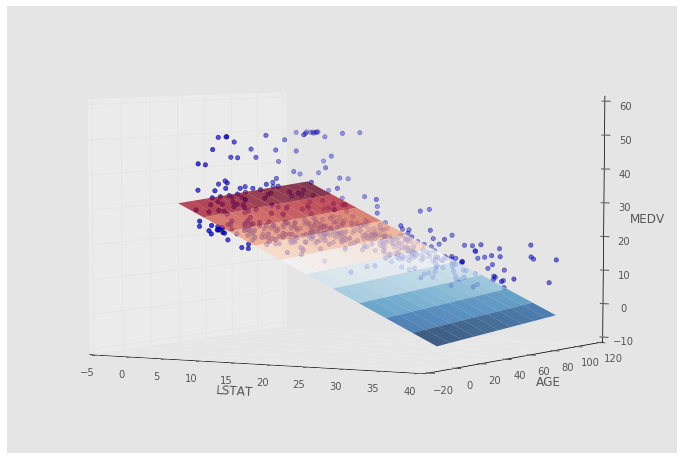

In [9]:
# create our design matrix using LSTAT and AGE predictors
X = sm.add_constant(boston_df[['LSTAT','AGE']])

# set the dependent variable
Y = boston_df.MEDV

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d',azim=-60, elev=5)

# create the model instance and estimate
model = sm.OLS(Y,X)
estimate = model.fit()
# data about the model is stored in summary
print('Model parameters:\n', estimate.params[:])

# Plot the data
ax.scatter(X.loc[:,'LSTAT'], X.loc[:,'AGE'], Y.values, facecolors=(0,0,0,0),\
           edgecolor='k', depthshade=True);
ax.set_xlabel('LSTAT');
ax.set_ylabel('AGE')
ax.set_zlabel('MEDV')

# Plot the OLS estimate
# create a grid of points
xx1, xx2 = np.meshgrid(np.linspace(X.LSTAT.min(), X.LSTAT.max(), 100), 
                       np.linspace(X.AGE.min(), X.AGE.max(), 100))

# plot the plane by evaluating the parameters over the grid
Z = estimate.params[0] + estimate.params[1] * xx1 + estimate.params[2] * xx2
# plot plane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.75, linewidth=0)



#### Now we will perform the regression over all 13 predictors in the boston housing dataset.

In [10]:
# create our design matrix using all the predictors (last column is MEDV)
X = sm.add_constant(boston_df.iloc[:,0:-1])

# create the model instance and estimate
model = sm.OLS(Y,X)
est = model.fit()
# data about the model is stored in summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 24 Jun 2016   Prob (F-statistic):          6.95e-135
Time:                        10:05:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

In [11]:
# Compute all the variance inflation factors
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIFs = [(predictor, variance_inflation_factor(X.values,_)) \
        for _,predictor in enumerate(list(X))] # list(X) returns column names of df

print('Variance Inflation Factors')
for tup in VIFs:
    print('{:10}'.format(tup[0]), '{:.3f}'.format(tup[1]))

Variance Inflation Factors
const      585.425
CRIM       1.773
ZN         2.299
INDUS      3.991
CHAS       1.074
NOX        4.395
RM         1.934
AGE        3.101
DIS        3.957
RAD        7.481
TAX        9.008
PTRATIO    1.799
B          1.346
LSTAT      2.938


## 3.6.4 Interaction Terms

#### Statsmodels uses the patsy package to convert formulas to matrices for fitting. This allows for easy implementation of arbitrary functions of the predictors.

In [12]:
# import statsmodels patsy api
import statsmodels.formula.api as smf

In [13]:
# Construct model and fit
model = smf.ols(formula='MEDV ~ LSTAT*AGE', data=boston_df)
estimate = model.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 24 Jun 2016   Prob (F-statistic):           4.86e-88
Time:                        10:05:13   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

## 3.6.5 Non-linear Transformations of the Predictors

#### Statsmodel patsy api allows us to include non-linear terms

In [14]:
model = smf.ols('MEDV ~ LSTAT + I(LSTAT**2)', data=boston_df)
quadratic_results = model.fit()
print(quadratic_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 24 Jun 2016   Prob (F-statistic):          1.56e-112
Time:                        10:05:13   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

#### The near zero p-value for the quadratic term suggest an improved model. We will plot and perform some diagnostics of the fit.

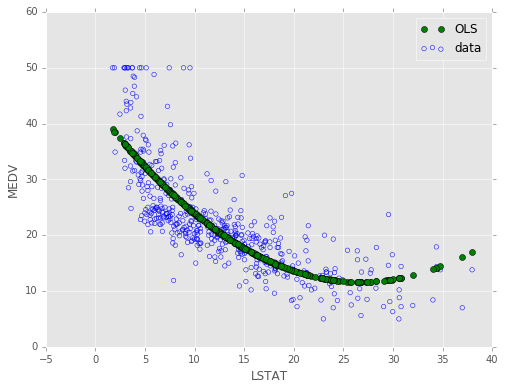

In [15]:
fig, ax = plt.subplots(figsize=(8,6))

# get numpy array values from dataframe
x = boston_df.LSTAT.values
y = boston_df.MEDV.values

# Plot the data
ax.scatter(x, y, facecolors='none', edgecolors='b', label="data");
# plot the models fitted values
ax.plot(x, quadratic_results.fittedvalues, 'g', marker='o',linestyle='none', label="OLS");

ax.legend(loc='best');

plt.xlabel('LSTAT');
plt.ylabel('MEDV');

#### Diagnostic tests of quadratic estimate

In [16]:
# import anova function
from statsmodels.stats.api import anova_lm

# perform the hypothesis test (see https://en.wikipedia.org/wiki/F-test regression section)
anova_table = anova_lm(linear_results, quadratic_results)
print(anova_table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0       504  19472.381418        0         NaN         NaN           NaN
1       503  15347.243158        1  4125.13826  135.199822  7.630116e-28


#### The F-statistic is 135 with a p-value of ~0 indicating there is a large difference in the unexplained variances of the two models. This is not too suprising given the plot above. Now consider the residuals.

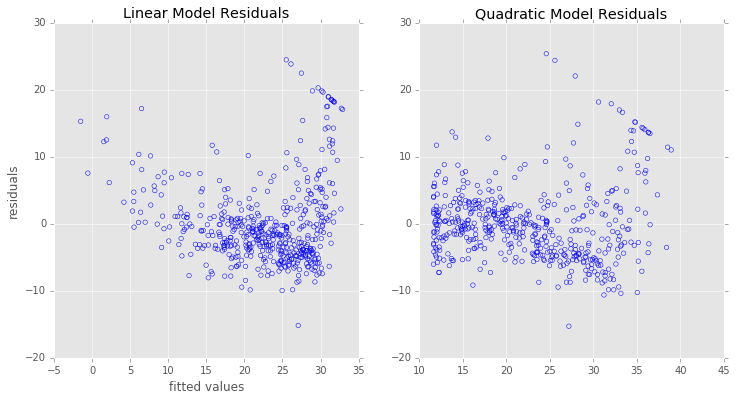

In [19]:
# Create plots of residuals
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# RESIDUALS OF LINEAR MODEL
# The results contain the residuals
linear_fit_values = linear_results.fittedvalues.values
residuals = linear_results.resid.values

# Plot the residual for each fitted value for the linear model
ax1.scatter(linear_fit_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
ax1.set_title('Linear Model Residuals')

# RESIDUALS OF QUADRATIC MODEL
# The results contain the residuals
quadratic_fit_values = quadratic_results.fittedvalues.values
quadratic_residuals = quadratic_results.resid.values
ax2.scatter(quadratic_fit_values, quadratic_residuals, facecolors='none', edgecolors='b');
ax2.set_title('Quadratic Model Residuals');

#### We can also try higher order polynomial fits:

In [20]:
formula = 'MEDV ~ 1 + ' + ' + '.join('I(LSTAT**{})'.format(i) for i in range(1, 6))
print(formula)
model = smf.ols(formula, data=boston_df)
order_5_results = model.fit()
print(order_5_results.summary())

MEDV ~ 1 + I(LSTAT**1) + I(LSTAT**2) + I(LSTAT**3) + I(LSTAT**4) + I(LSTAT**5)
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Fri, 24 Jun 2016   Prob (F-statistic):          8.73e-122
Time:                        10:57:12   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------

## 3.6.6 Qualitative Predictors

In [31]:
# Examine the head of the carseats data set
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [86]:
# Construct the formula with two interaction terms
formula ='Sales ~' + '+'.join(list(carseats_df.iloc[:,1:].columns.tolist()) + ['Income:Advertising'] + ['Price:Age'])
print(formula)

print()

model = smf.ols(formula, data=carseats_df)
carseat_results = model.fit()
print(carseat_results.summary())

Sales ~CompPrice+Income+Advertising+Population+Price+ShelveLoc+Age+Education+Urban+US+Income:Advertising+Price:Age

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Fri, 24 Jun 2016   Prob (F-statistic):          6.14e-166
Time:                        14:38:28   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
------

In [85]:
# The default treatment for categoricals in patsy is the reference=0. In this case the dummy variable for bad is 0.
# more treatments can be found in the patsy documentation. ....from patsy.contrasts import Treatment